In [1]:
import positenc
import numpy as np
np.random.seed(42)
max_length = 16
d_model = 32
obj = positenc.PositionalEncoding(max_length=max_length, d_model=d_model)
emb = np.random.rand(max_length, d_model)
pe = obj.encode(emb)
# print(emb)

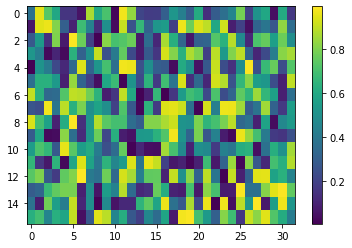

In [2]:
import matplotlib.pyplot as plt
# emb.shape
em = plt.imshow(emb, aspect="auto")
plt.colorbar(em)


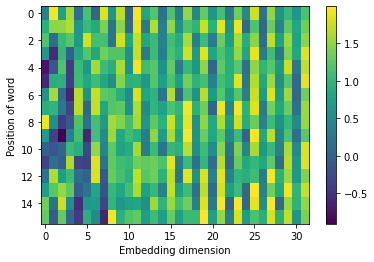

In [3]:

im = plt.imshow(pe, aspect="auto")
plt.xlabel("Embedding dimension")
plt.ylabel("Position of word")
plt.colorbar(im)

In [4]:
import selfAttention
import torch
torch.manual_seed(42)
att = selfAttention.SelfAttention(d_model)
emb = torch.from_numpy(pe)
emb.dtype
# att.float()
z, s = att.forward(emb.float())
z = z.detach().numpy()
s = s.detach().numpy()
print(z.shape)

(16, 32)


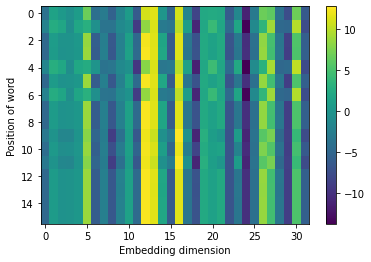

In [5]:
ze = plt.imshow(z, aspect="auto")
plt.xlabel("Embedding dimension")
plt.ylabel("Position of word")
plt.colorbar(ze)

(16, 16)


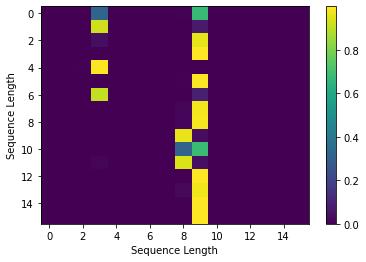

In [6]:
ze = plt.imshow(s, aspect="auto")
plt.xlabel("Sequence Length")
plt.ylabel("Sequence Length")
plt.colorbar(ze)
print(s.shape)

In [7]:
np.set_printoptions(precision=3)
# # x = np.arange(1, 9).reshape(1, 8)
# # A = np.arange(1, 8*8*3 + 1).reshape(8,  8*3) // 64
# # y = x @ A
# y = np.arange(1, 49).reshape(2, 3*8)
# # y = np.arange(1, 25).reshape(1, 24)
# print(y.shape)
# print(*y, sep="\n")
# y = y.reshape(2, 3, 4, 8//4) # (sequence_length, qkv, heads, 3*dim_k)
# # y = y.reshape(1, 3, 4, 8//4) # (sequence_length, qkv, heads, dk_dv)

# print(y)
# y = y.transpose(2, 1, 0, -1) # (heads, qkv, sequence_length, 3*dk_dv)
# q, k, v = np.split(y, 3, axis=1)
# print(y)
# y1 = np.arange(1, 2*512+1).reshape(2, 512)
y1 = np.arange(1, 49).reshape(2, 3*8)

y1 = y1.reshape(2, 4, 3*(8//4)) # (sequence_length, heads, 3*dim_k)
# y = y.reshape(1, 3, 4, 8//4) # (sequence_length, qkv, heads, dk_dv)

# print(y1)
y1 = y1.transpose(1, 0, -1) # (heads, sequence_length, 3*dk_dv)
q1, k1, v1 = np.split(y1, 3, axis=-1)
print(y1)
print("\n")
# q = q.squeeze()
# k = k.squeeze()
# v = v.squeeze()
# print(q)
# print(q.shape)
# print(k)
# print(v)
# q = q.squeeze().transpose(1, 0, 2)
# k = k.squeeze().transpose(1, 0, 2)
# print(q.shape, k.shape, v.shape)

q1 = q1.squeeze()
k1 = k1.squeeze()
v1 = v1.squeeze()
print(q1)
print("\n")
print(q1.shape)
print(k1)
print("\n")
print(v1)
print("\n")
att = np.matmul(q1, k1.transpose(0, -1, -2))
print("attention is=")
print(att)
# val = att @ v
# print(val)
# print(val.shape)
# val = val.transpose(1, 0, -1)
# print(val.shape)
# print(val)
# val.reshape(2,8)
# np.matmul(q1, k1.transpose(0, -1, -2))

[[[ 1  2  3  4  5  6]
  [25 26 27 28 29 30]]

 [[ 7  8  9 10 11 12]
  [31 32 33 34 35 36]]

 [[13 14 15 16 17 18]
  [37 38 39 40 41 42]]

 [[19 20 21 22 23 24]
  [43 44 45 46 47 48]]]


[[[ 1  2]
  [25 26]]

 [[ 7  8]
  [31 32]]

 [[13 14]
  [37 38]]

 [[19 20]
  [43 44]]]


(4, 2, 2)
[[[ 3  4]
  [27 28]]

 [[ 9 10]
  [33 34]]

 [[15 16]
  [39 40]]

 [[21 22]
  [45 46]]]


[[[ 5  6]
  [29 30]]

 [[11 12]
  [35 36]]

 [[17 18]
  [41 42]]

 [[23 24]
  [47 48]]]


attention is=
[[[  11   83]
  [ 179 1403]]

 [[ 143  503]
  [ 599 2111]]

 [[ 419 1067]
  [1163 2963]]

 [[ 839 1775]
  [1871 3959]]]


In [8]:
import multihead

ml = multihead.Multihead(d_model, d_model, 4)

In [9]:
print(emb.shape)
softmax,values =  ml.forward(emb[None, ::].to(torch.float32), ret_att=True)

torch.Size([16, 32])


In [10]:
print(values.shape)
values

torch.Size([1, 16, 32])


tensor([[[-6.5351e-02, -3.4515e-01, -3.1661e-02, -9.3565e-02, -8.7561e-01,
           1.7825e-01,  5.9130e-01,  1.6363e-01,  1.3781e-01, -2.5729e-03,
          -3.3264e-01, -1.2317e-01, -3.9755e-01,  9.9883e-01,  1.3732e-01,
          -3.5535e-01, -2.6523e-01, -8.0276e-01, -8.0842e-01,  1.0203e-01,
          -9.0307e-01, -7.1524e-01, -2.1237e-01,  3.2171e-01, -4.2837e-02,
          -6.2203e-01, -7.3350e-01,  7.6561e-01, -4.9780e-01,  3.1468e-01,
          -3.3774e-01,  1.7000e-01],
         [-5.8277e-02, -3.2583e-01, -4.3357e-02, -9.3698e-02, -8.9087e-01,
           1.5853e-01,  5.7904e-01,  1.7474e-01,  1.3762e-01, -1.0152e-03,
          -3.4059e-01, -1.3077e-01, -3.9297e-01,  1.0035e+00,  1.3800e-01,
          -3.4818e-01, -2.5195e-01, -7.9622e-01, -8.0637e-01,  1.1304e-01,
          -8.9579e-01, -7.1975e-01, -2.0638e-01,  3.3705e-01, -4.1351e-02,
          -6.0608e-01, -7.2090e-01,  7.6900e-01, -5.0843e-01,  3.1134e-01,
          -3.3094e-01,  1.8682e-01],
         [-7.3020e-02, -3.

In [11]:
print(softmax.shape)
print(softmax)

torch.Size([1, 4, 1, 16, 16])
tensor([[[[[0.0358, 0.0377, 0.0485,  ..., 0.0543, 0.0519, 0.0579],
           [0.0275, 0.0317, 0.0449,  ..., 0.0530, 0.0472, 0.0546],
           [0.0357, 0.0406, 0.0520,  ..., 0.0618, 0.0532, 0.0584],
           ...,
           [0.0299, 0.0311, 0.0431,  ..., 0.0582, 0.0521, 0.0597],
           [0.0216, 0.0239, 0.0364,  ..., 0.0518, 0.0503, 0.0579],
           [0.0264, 0.0301, 0.0414,  ..., 0.0573, 0.0528, 0.0597]]],


         [[[0.0689, 0.0733, 0.0608,  ..., 0.0613, 0.0543, 0.0594],
           [0.0730, 0.0758, 0.0609,  ..., 0.0607, 0.0541, 0.0591],
           [0.0662, 0.0702, 0.0619,  ..., 0.0545, 0.0509, 0.0572],
           ...,
           [0.0847, 0.0737, 0.0646,  ..., 0.0676, 0.0655, 0.0672],
           [0.0754, 0.0716, 0.0676,  ..., 0.0771, 0.0742, 0.0712],
           [0.0694, 0.0678, 0.0688,  ..., 0.0725, 0.0706, 0.0750]]],


         [[[0.0649, 0.0741, 0.0556,  ..., 0.0585, 0.0598, 0.0604],
           [0.0672, 0.0822, 0.0550,  ..., 0.0592, 0.0689, 0

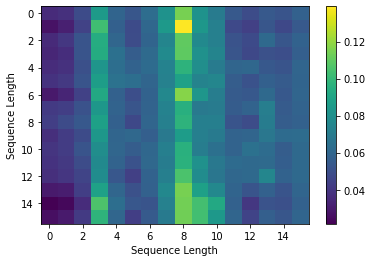

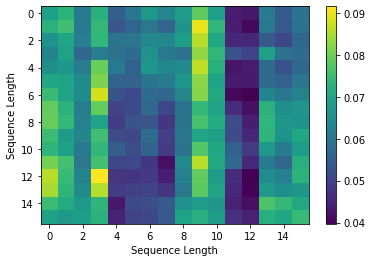

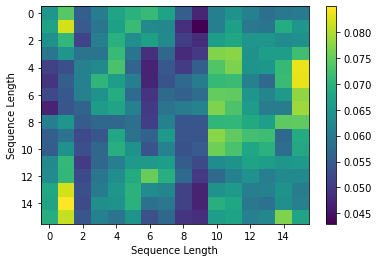

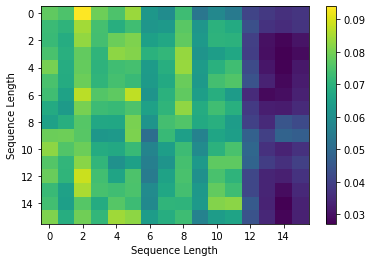

<Figure size 432x288 with 0 Axes>

In [12]:
for i in range(4):
    ze = plt.imshow(softmax.detach().numpy().squeeze()[i], aspect="auto")
    plt.xlabel("Sequence Length")
    plt.ylabel("Sequence Length")
    plt.colorbar(ze)
    plt.figure()
    # print(softmax.detach().numpy().squeeze()[i].shape)
    # print(softmax.detach().numpy().squeeze()[i].sum(axis=1))
    # print(softmax.detach().numpy().squeeze()[i].max(axis=1))

In [13]:
np.set_printoptions(precision=2)
so = softmax.detach().numpy().squeeze()
print(so[0].sum(axis=1))

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [14]:
so = so.transpose(1, 0, -1)
so =so.reshape(16, 16*4)

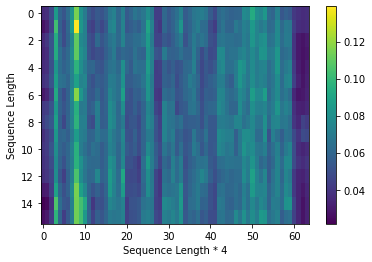

In [15]:
ze = plt.imshow(so, aspect="auto")
plt.xlabel("Sequence Length * 4")
plt.ylabel("Sequence Length")
plt.colorbar(ze)

In [16]:
mh = multihead.Multihead(d_model, d_model, 4, decoder=True)


In [17]:
emb[None, ::].to(torch.float32)
qkv = torch.rand(6, 8)
qkv

# mh.forward()

tensor([[0.3083, 0.4232, 0.6460, 0.8975, 0.7084, 0.9610, 0.6639, 0.7561],
        [0.6084, 0.9129, 0.8911, 0.8037, 0.0763, 0.4445, 0.3306, 0.4248],
        [0.8560, 0.1699, 0.2394, 0.2972, 0.5352, 0.2222, 0.5999, 0.0763],
        [0.2441, 0.7986, 0.8448, 0.3437, 0.5267, 0.4830, 0.1460, 0.3879],
        [0.7952, 0.5168, 0.9796, 0.0915, 0.1456, 0.0737, 0.1835, 0.6049],
        [0.8345, 0.0907, 0.1185, 0.3148, 0.7966, 0.7641, 0.4492, 0.9561]])

In [18]:
qkv = qkv.reshape(3, 2, 4, 2)
qkv

tensor([[[[0.3083, 0.4232],
          [0.6460, 0.8975],
          [0.7084, 0.9610],
          [0.6639, 0.7561]],

         [[0.6084, 0.9129],
          [0.8911, 0.8037],
          [0.0763, 0.4445],
          [0.3306, 0.4248]]],


        [[[0.8560, 0.1699],
          [0.2394, 0.2972],
          [0.5352, 0.2222],
          [0.5999, 0.0763]],

         [[0.2441, 0.7986],
          [0.8448, 0.3437],
          [0.5267, 0.4830],
          [0.1460, 0.3879]]],


        [[[0.7952, 0.5168],
          [0.9796, 0.0915],
          [0.1456, 0.0737],
          [0.1835, 0.6049]],

         [[0.8345, 0.0907],
          [0.1185, 0.3148],
          [0.7966, 0.7641],
          [0.4492, 0.9561]]]])

In [19]:
qkv = qkv.permute(0, 2, 1, -1)
qkv

tensor([[[[0.3083, 0.4232],
          [0.6084, 0.9129]],

         [[0.6460, 0.8975],
          [0.8911, 0.8037]],

         [[0.7084, 0.9610],
          [0.0763, 0.4445]],

         [[0.6639, 0.7561],
          [0.3306, 0.4248]]],


        [[[0.8560, 0.1699],
          [0.2441, 0.7986]],

         [[0.2394, 0.2972],
          [0.8448, 0.3437]],

         [[0.5352, 0.2222],
          [0.5267, 0.4830]],

         [[0.5999, 0.0763],
          [0.1460, 0.3879]]],


        [[[0.7952, 0.5168],
          [0.8345, 0.0907]],

         [[0.9796, 0.0915],
          [0.1185, 0.3148]],

         [[0.1456, 0.0737],
          [0.7966, 0.7641]],

         [[0.1835, 0.6049],
          [0.4492, 0.9561]]]])

In [20]:
q, k, v = qkv.chunk(3, dim=0)

In [21]:
q, k, v

(tensor([[[[0.3083, 0.4232],
           [0.6084, 0.9129]],
 
          [[0.6460, 0.8975],
           [0.8911, 0.8037]],
 
          [[0.7084, 0.9610],
           [0.0763, 0.4445]],
 
          [[0.6639, 0.7561],
           [0.3306, 0.4248]]]]),
 tensor([[[[0.8560, 0.1699],
           [0.2441, 0.7986]],
 
          [[0.2394, 0.2972],
           [0.8448, 0.3437]],
 
          [[0.5352, 0.2222],
           [0.5267, 0.4830]],
 
          [[0.5999, 0.0763],
           [0.1460, 0.3879]]]]),
 tensor([[[[0.7952, 0.5168],
           [0.8345, 0.0907]],
 
          [[0.9796, 0.0915],
           [0.1185, 0.3148]],
 
          [[0.1456, 0.0737],
           [0.7966, 0.7641]],
 
          [[0.1835, 0.6049],
           [0.4492, 0.9561]]]]))

In [30]:
m = torch.ones(5, 5)
m = torch.tril(m, diagonal=2)
m

tensor([[1., 1., 1., 0., 0.],
        [1., 1., 1., 1., 0.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]])

In [28]:
n = torch.ones(5, 5)
n = torch.tril(n, diagonal=0)
n

tensor([[1., 0., 0., 0., 0.],
        [1., 1., 0., 0., 0.],
        [1., 1., 1., 0., 0.],
        [1., 1., 1., 1., 0.],
        [1., 1., 1., 1., 1.]])

In [34]:
b = m + n

In [35]:
b == 0

tensor([[False, False, False,  True,  True],
        [False, False, False, False,  True],
        [False, False, False, False, False],
        [False, False, False, False, False],
        [False, False, False, False, False]])